<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><ul class="toc-item"><li><ul class="toc-item"><li><span><a href="#Libraries" data-toc-modified-id="Libraries-0.0.1"><span class="toc-item-num">0.0.1&nbsp;&nbsp;</span>Libraries</a></span></li></ul></li></ul></li><li><span><a href="#Elasticity-Dataframe" data-toc-modified-id="Elasticity-Dataframe-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Elasticity Dataframe</a></span><ul class="toc-item"><li><span><a href="#Merger" data-toc-modified-id="Merger-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Merger</a></span></li><li><span><a href="#NaN-values" data-toc-modified-id="NaN-values-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>NaN values</a></span><ul class="toc-item"><li><span><a href="#Syria" data-toc-modified-id="Syria-1.2.1"><span class="toc-item-num">1.2.1&nbsp;&nbsp;</span>Syria</a></span></li><li><span><a href="#Region-re-naming" data-toc-modified-id="Region-re-naming-1.2.2"><span class="toc-item-num">1.2.2&nbsp;&nbsp;</span>Region re-naming</a></span></li><li><span><a href="#Regional-Elasticity" data-toc-modified-id="Regional-Elasticity-1.2.3"><span class="toc-item-num">1.2.3&nbsp;&nbsp;</span>Regional Elasticity</a></span></li><li><span><a href="#Iceland" data-toc-modified-id="Iceland-1.2.4"><span class="toc-item-num">1.2.4&nbsp;&nbsp;</span>Iceland</a></span></li><li><span><a href="#Filling-in-elasticity-values" data-toc-modified-id="Filling-in-elasticity-values-1.2.5"><span class="toc-item-num">1.2.5&nbsp;&nbsp;</span>Filling in elasticity values</a></span></li></ul></li></ul></li><li><span><a href="#Task-2" data-toc-modified-id="Task-2-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Task 2</a></span><ul class="toc-item"><li><span><a href="#Compute-Mean-Income" data-toc-modified-id="Compute-Mean-Income-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Compute Mean Income</a></span></li></ul></li><li><span><a href="#Model-code-revision" data-toc-modified-id="Model-code-revision-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Model code revision</a></span><ul class="toc-item"><li><ul class="toc-item"><li><span><a href="#Generate_income" data-toc-modified-id="Generate_income-3.0.1"><span class="toc-item-num">3.0.1&nbsp;&nbsp;</span>Generate_income</a></span></li><li><span><a href="#Compute-quantile" data-toc-modified-id="Compute-quantile-3.0.2"><span class="toc-item-num">3.0.2&nbsp;&nbsp;</span>Compute quantile</a></span></li><li><span><a href="#Transition-Matrix" data-toc-modified-id="Transition-Matrix-3.0.3"><span class="toc-item-num">3.0.3&nbsp;&nbsp;</span>Transition Matrix</a></span></li></ul></li><li><span><a href="#Probability-calculation" data-toc-modified-id="Probability-calculation-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Probability calculation</a></span></li></ul></li><li><span><a href="#Parent-income-class-generation" data-toc-modified-id="Parent-income-class-generation-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Parent income class generation</a></span><ul class="toc-item"><li><span><a href="#Generate-Clones" data-toc-modified-id="Generate-Clones-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Generate Clones</a></span></li><li><span><a href="#Compute-Elasticity" data-toc-modified-id="Compute-Elasticity-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>Compute Elasticity</a></span></li><li><span><a href="#Transitional-matrix" data-toc-modified-id="Transitional-matrix-4.3"><span class="toc-item-num">4.3&nbsp;&nbsp;</span>Transitional matrix</a></span></li><li><span><a href="#Parent_class" data-toc-modified-id="Parent_class-4.4"><span class="toc-item-num">4.4&nbsp;&nbsp;</span>Parent_class</a></span><ul class="toc-item"><li><span><a href="#Graphs" data-toc-modified-id="Graphs-4.4.1"><span class="toc-item-num">4.4.1&nbsp;&nbsp;</span>Graphs</a></span></li></ul></li></ul></li></ul></div>

### Libraries

In [2]:
from functions import * 

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import pickle
import seaborn as sns

import scipy.stats as st 
from collections import Counter 
import inspect

In [3]:
df = pd.read_csv('Task_1/df.csv', index_col=0)

In [4]:
display(df.head(2))
display(df.describe())
display(df.info())

,country_name,country_code,population,quantile,income,gdp_ppp,gini
0,Albania,ALB,2947314,1,728,7297,30
1,Albania,ALB,2947314,2,916,7297,30


,population,quantile,income,gdp_ppp,gini
count,1.140000e+04,11400.000000,11400.000000,11400.000000,11400.000000
mean,5.456928e+07,50.500000,6011.266930,12346.228070,37.570175
std,1.696056e+08,28.867336,9378.539924,13157.915168,8.068017
min,3.174140e+05,1.000000,16.000000,303.000000,23.000000
25%,4.768212e+06,25.750000,885.000000,2576.000000,32.000000
50%,1.391666e+07,50.500000,2377.000000,7488.500000,35.500000
75%,4.027377e+07,75.250000,7398.500000,17571.000000,43.000000
max,1.324655e+09,100.000000,176928.000000,73127.000000,63.000000


<class 'pandas.core.frame.DataFrame'>
Index: 11400 entries, 0 to 11399
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   country_name  11400 non-null  object
 1   country_code  11400 non-null  object
 2   population    11400 non-null  int64 
 3   quantile      11400 non-null  int64 
 4   income        11400 non-null  int64 
 5   gdp_ppp       11400 non-null  int64 
 6   gini          11400 non-null  int64 
dtypes: int64(5), object(2)
memory usage: 712.5+ KB


None

# Elasticity Dataframe

In [5]:
elas = pd.read_csv('raw_data/elasticity.csv')

I won't need everything in the elasticity excel, so I will just retrieve the  IGEincome column which represnts elasticity.

In [6]:
display(elas.head(2))

,countryname,wbcode,iso3,region,incgroup2,incgroup4,fragile,survey,year,status,...,Cores2125_MAcatC1,Shortfall0611_obs,Shortfall0611_IGP,Shortfall1217_obs,Shortfall1217_IGP,IGEincome,S1,S2,S3,MLD_psu
0,Afghanistan,AFG,AFG,South Asia,Developing economies,Low income,1,NRVA,1980,Co-residents only,...,NaN,25103.0,0.086197,18054.0,0.345224,NaN,NaN,NaN,NaN,0.1
1,Afghanistan,AFG,AFG,South Asia,Developing economies,Low income,1,NRVA,1980,Co-residents only,...,NaN,12107.0,0.083271,8538.0,0.389952,NaN,NaN,NaN,NaN,0.1


In [7]:
elas = elas[['countryname', 'iso3', 'region','IGEincome']]

In [8]:
elas.rename(columns = 
            {'countryname': 'country_name',
            'iso3': 'country_code',
            'IGEincome':'elasticity'}, inplace = True)

There are many rows per country because the original data had other columns with different data but we only really need one row per country to show the elasticity.

In [9]:
elas = elas.groupby(['country_name','country_code'])[['region','elasticity']].first().reset_index()

In [10]:
elas.head(10)

,country_name,country_code,region,elasticity
0,Afghanistan,AFG,South Asia,NaN
1,Albania,ALB,Europe & Central Asia,0.815874
2,Angola,AGO,Sub-Saharan Africa,NaN
3,Argentina,ARG,Latin America & Caribbean,NaN
4,Armenia,ARM,Europe & Central Asia,NaN
5,Australia,AUS,High income,0.275000
6,Austria,AUT,High income,0.245267
7,Azerbaijan,AZE,Europe & Central Asia,NaN
8,Bangladesh,BGD,South Asia,0.538000
9,Belarus,BLR,Europe & Central Asia,0.342738


There are some NaN values, but let's first merge this with df before correcting them.

## Merger

In [11]:
df.head(2)

,country_name,country_code,population,quantile,income,gdp_ppp,gini
0,Albania,ALB,2947314,1,728,7297,30
1,Albania,ALB,2947314,2,916,7297,30


In [12]:
df = pd.merge(df, elas, on='country_code', how='left')

In [13]:
df.head()

,country_name_x,country_code,population,quantile,income,gdp_ppp,gini,country_name_y,region,elasticity
0,Albania,ALB,2947314,1,728,7297,30,Albania,Europe & Central Asia,0.815874
1,Albania,ALB,2947314,2,916,7297,30,Albania,Europe & Central Asia,0.815874
2,Albania,ALB,2947314,3,1010,7297,30,Albania,Europe & Central Asia,0.815874
3,Albania,ALB,2947314,4,1086,7297,30,Albania,Europe & Central Asia,0.815874
4,Albania,ALB,2947314,5,1132,7297,30,Albania,Europe & Central Asia,0.815874


## NaN values

Now let's see how many contries with NA values we have

In [14]:
missing = df[df.isna().any(axis=1)]

In [15]:
missing.groupby( by='country_name_x').first()

,country_code,population,quantile,income,gdp_ppp,gini,country_name_y,region,elasticity
country_name_x,,,,,,,,,
Argentina,ARG,40273769,1,254,13220,45,Argentina,Latin America & Caribbean,NaN
Armenia,ARM,2983421,1,366,5611,29,Armenia,Europe & Central Asia,NaN
Azerbaijan,AZE,8763400,1,397,8101,26,Azerbaijan,Europe & Central Asia,NaN
Bhutan,BTN,689737,1,254,4525,38,Bhutan,South Asia,NaN
Bulgaria,BGR,7492561,1,271,11993,33,Bulgaria,Europe & Central Asia,NaN
Burkina Faso,BFA,15197915,1,138,1085,39,Burkina Faso,Sub-Saharan Africa,NaN
Cambodia,KHM,13943888,1,345,1802,35,Cambodia,East Asia & Pacific,NaN
Cameroon,CMR,18777081,1,396,2007,42,Cameroon,Sub-Saharan Africa,NaN
Central African Republic,CAF,4467233,1,40,685,56,Central African Republic,Sub-Saharan Africa,NaN


In [16]:
missing['country_name_x'].unique()

array(['Argentina', 'Armenia', 'Azerbaijan', 'Bhutan', 'Bulgaria',
       'Burkina Faso', 'Cambodia', 'Cameroon', 'Central African Republic',
       'Costa Rica', "Cote d'Ivoire", 'Dominican Republic', 'El Salvador',
       'Estonia', 'Eswatini', 'Fiji', 'Georgia', 'Honduras', 'Hungary',
       'Iceland', 'Indonesia', 'Iran, Islamic Rep.', 'Iraq', 'Israel',
       'Lao PDR', 'Liberia', 'Lithuania', 'Mauritania', 'Mexico',
       'Moldova', 'Montenegro', 'Mozambique', 'Nicaragua', 'Niger',
       'Paraguay', 'Philippines', 'Poland', 'Serbia', 'Sudan',
       'Syrian Arab Republic', 'Tajikistan', 'Thailand', 'Turkiye',
       'Ukraine', 'Uruguay', 'Venezuela, RB', 'West Bank and Gaza',
       'Yemen, Rep.'], dtype=object)

Seems like lot of countries miss the value for elasticity. For these countries we will estimate it based on their region.

In [17]:
df['region'].unique()

array(['Europe & Central Asia', 'Latin America & Caribbean',
       'High income', 'South Asia', 'Sub-Saharan Africa',
       'East Asia & Pacific', 'Middle East & North Africa', nan],
      dtype=object)

### Syria

First I will replace the Syrian Arap Republic's region because it is missing.

In [18]:
df.loc[df['country_name_x'] == 'Syrian Arab Republic', 'region'] = 'Middle East & North Africa'

### Region re-naming

Now I will add the region for the countries who are missing elasticity values and who have their region labeled as High income because otherwise the code I will write to add the elasticity values won't work.

In [19]:
missing[missing['region'] == 'High income']['country_name_x'].unique()

array(['Estonia', 'Hungary', 'Iceland', 'Israel', 'Lithuania', 'Poland',
       'Uruguay'], dtype=object)

I will correct these region values first, because then I will use the regions to allocate elasticity values

In [20]:
df.loc[df['country_name_x'] == 'Estonia', 'region'] = 'Europe & Central Asia'
df.loc[df['country_name_x'] == 'Hungary', 'region'] = 'Europe & Central Asia'
df.loc[df['country_name_x'] == 'Iceland', 'region'] = 'Europe & Central Asia'
df.loc[df['country_name_x'] == 'Israel', 'region'] = 'Middle East & North Africa'
df.loc[df['country_name_x'] == 'Lithuania', 'region'] = 'Europe & Central Asia'
df.loc[df['country_name_x'] == 'Poland', 'region'] = 'Europe & Central Asia'
df.loc[df['country_name_x'] == 'Uruguay', 'region'] = 'Latin America & Caribbean'


### Regional Elasticity 

For the elasticity values I will use the estimations given in the notes for each region. In the notes, they gave only one value for Asia, and also Latin American and Africa, but within the dataframes, these regions were broken down further:

In [21]:
reg_elas = pd.read_csv('raw_data/regional_elasticity.csv')

In [22]:
reg_elas

,region,elasticity
0,Nordic Europe,0.20
1,Europe & Central Asia,0.40
2,South Asia,0.50
3,East Asia & Pacific,0.50
4,Latin America & Caribbean,0.66
5,Middle East & North Africa,0.66
6,Sub-Saharan Africa,0.66


### Iceland

The regional elasticity values differentiation between Europe and Northern Europe.  Iceland is the only northern european country with a missing elasticity , so I will substitute that directly, but for the rest of the countries I will do it via using the region column

In [23]:
df.loc[df['country_name_x'] == 'Iceland', 'elasticity'] = 0.20

### Filling in elasticity values

Code for replacing elasticty values based on region:

In [24]:
# Create a dictionary from the reg_elas dataframe
region_to_elasticity = dict(zip(reg_elas['region'], reg_elas['elasticity']))

# Function to update elasticity based on region
def update_elasticity(row):
    if pd.isna(row['elasticity']):
        return region_to_elasticity.get(row['region'], row['elasticity'])
    return row['elasticity']

# Apply the function to update the elasticity column
df['elasticity'] = df.apply(update_elasticity, axis=1)

Let's put the df on a diet, we don't need the second country name and region columns

In [25]:
df = df.drop(columns = ['population','country_name_x','country_name_y','region'])

In [26]:
df.rename(columns=
{'country_code':'country'},inplace =True)

In [27]:
df.head()

,country,quantile,income,gdp_ppp,gini,elasticity
0,ALB,1,728,7297,30,0.815874
1,ALB,2,916,7297,30,0.815874
2,ALB,3,1010,7297,30,0.815874
3,ALB,4,1086,7297,30,0.815874
4,ALB,5,1132,7297,30,0.815874


# Task 2

## Compute Mean Income

In [28]:
df['mi'] = df.groupby('country')['income'].transform('mean')

In [29]:
df.head()

,country,quantile,income,gdp_ppp,gini,elasticity,mi
0,ALB,1,728,7297,30,0.815874,2994.27
1,ALB,2,916,7297,30,0.815874,2994.27
2,ALB,3,1010,7297,30,0.815874,2994.27
3,ALB,4,1086,7297,30,0.815874,2994.27
4,ALB,5,1132,7297,30,0.815874,2994.27


In [30]:
df.sample(10)

,country,quantile,income,gdp_ppp,gini,elasticity,mi
617,BLR,18,2244,11651,27,0.342738,3920.67
3395,SWZ,96,1639,4748,51,0.660000,529.78
6828,MRT,29,904,2226,35,0.660000,1798.09
3720,GEO,21,584,4516,38,0.400000,1363.29
5173,ISR,74,13948,25740,41,0.660000,11099.76
7960,NGA,61,574,1946,35,0.657949,691.40
5657,KEN,58,501,1429,46,0.670373,518.82
877,BTN,78,1932,4525,38,0.500000,1515.45
6059,LVA,60,6379,15596,37,0.889911,6763.97
131,ARG,32,2746,13220,45,0.660000,5847.43


In [31]:
df.shape

(11400, 7)

# Model code revision

### Generate_income

The assumptions we will use to revise the steps of the code given:

In [32]:
pj = 0.9
nb_quantiles = 100 
n = 1000 * nb_quantiles 

Mark's notes:
1/ Generate a large number of realizations of a variable we will call . 𝑙𝑛(𝑌𝑝𝑎𝑟𝑒𝑛𝑡 ) following a normal distribution.Mean and standard deviation values will not affect the final result. n must be greater than 1000 times the number of quantiles. 

2/ Generate n realizations of the error term ε following a normal distribution with a mean of 0 and standard deviation of 1. ρ 

3/ For a given value of (for example 0.9), calculate 𝑗 value of α has no impact on the final result and can be deleted. At this stage, the order of magnitude of values 𝑦 𝑐ℎ𝑖𝑙𝑑 α+ρ 𝑗 𝑙𝑛(𝑦𝑝𝑎𝑟𝑒𝑛𝑡 )+ϵ 𝑦 𝑐ℎ𝑖𝑙𝑑 = 𝑒 The contains does not reflect the reality, which has no influence for further operations.

In [33]:
#checking the function I will use
from functions import generate_incomes
print(inspect.getsource(generate_incomes))

def generate_incomes(n, pj):
    ln_y_parent = st.norm(0, 1).rvs(size=n)
    residues = st.norm(0, 1).rvs(size=n)
    return np.exp(pj * ln_y_parent + residues),  np.exp(ln_y_parent)



In [34]:
y_child, y_parents = generate_incomes(n, pj)

In [35]:
display(y_child)
display(y_parents)

array([0.39261872, 1.71225702, 1.09016014, ..., 1.96713488, 1.26988052,
       4.93036392])

array([ 0.34513345,  3.14277714,  0.16765124, ...,  2.04178096,
        1.40868397, 10.26221784])

In [36]:
#Checking the shape
y_child.shape

(100000,)

### Compute quantile

I will use this function to allocate the percentage each individual belongs to to the income values. The percentages were calculated using the quantiles function within the compute_quantiles function.

Marks notes:

4/ For each of the n individuals generated, calculate the income class as its parents income class 𝑐 𝑐 𝑖,𝑝𝑎𝑟𝑒𝑛𝑡 from 𝑦 𝑐ℎ𝑖𝑙𝑑 and y parent.


In [37]:
print(inspect.getsource(compute_quantiles))

def compute_quantiles(y_child, y_parents, nb_quantiles):
    y_child = pd.Series(y_child)
    y_parents = pd.Series(y_parents)
    c_i_child = quantiles(y_child, nb_quantiles)
    c_i_parent = quantiles(y_parents, nb_quantiles)
    sample = pd.concat([y_child, y_parents, c_i_child, c_i_parent], axis=1)
    sample.columns = ["y_child", "y_parents", "c_i_child", "c_i_parent"]
    return sample



This is the quantiles function that is within the compute_quantiles function.

In [38]:
print(inspect.getsource(quantiles))

def quantiles(l, nb_quantiles):
    size = len(l)
    l_sorted = l.copy()
    l_sorted = l_sorted.sort_values()
    quantiles = np.round(np.arange(1, nb_quantiles + 1, nb_quantiles / size) - 0.5 + 1. / size)
    q_dict = {a: int(b) for a, b in zip(l_sorted, quantiles)}
    return pd.Series([q_dict[e] for e in l])



In [39]:
sample = compute_quantiles(y_child,y_parents,nb_quantiles)

In [40]:
display(sample.head())
sample.shape

,y_child,y_parents,c_i_child,c_i_parent
0,0.392619,0.345133,25,15
1,1.712257,3.142777,66,88
2,1.090160,0.167651,53,4
3,10.845374,2.940617,97,86
4,0.990874,0.380132,50,17


(100000, 4)

### Transition Matrix

After recieving the absolute income values and income class percentage values, we have to calculate the probability of each child - parent income class. To do that, we use the conditional_distribution function which counts each unique pair and calculates its probability of happening based on all the unique income pairs and their distribution. Within the conditional_distribution we nested the distribution function which we also inspect below. 

Marks notes: 5/ From this last information, estimate for each the conditional distribution of 𝑖,𝑐ℎ𝑖𝑙𝑑 𝑐 𝑖,𝑝𝑎𝑟𝑒𝑛𝑡 . For example, if there are 6 individuals with both 𝑐 𝑦 𝑝𝑎𝑟𝑒𝑛𝑡 𝑖,𝑐ℎ𝑖𝑙𝑑 . = 5 and 200 individuals out of 20000 we have 𝑐 𝑖,𝑐ℎ𝑖𝑙𝑑 𝑐 𝑖,𝑝𝑎𝑟𝑒𝑛𝑡 𝑐 𝑖,𝑐ℎ𝑖𝑙𝑑 as well = 8, and if for = 5, then the probability of having 𝑐 𝑖,𝑝𝑎𝑟𝑒𝑛𝑡 = 8 knowing that 𝑐 𝑖,𝑐ℎ𝑖𝑙𝑑 probability will be written as follows: 𝑐 ρ = 5and that = 0.9 will be estimated at 6/200 (this 𝑗 𝑃(𝑐 𝑖,𝑝𝑎𝑟𝑒𝑛𝑡 = 8 | 𝑐 𝑖,𝑐ℎ𝑖𝑙𝑑 = 5, ρ 𝑗 = 0. 9) = 0.03 . If our population is divided into income classes, then we should have c² estimates of these conditional probabilities for each country.

In [41]:
print(inspect.getsource(conditional_distributions))

def conditional_distributions(sample, nb_quantiles):
    counts = sample.groupby(["c_i_child", "c_i_parent"]).size().reset_index(name='counts')
    mat = []
    for child_quantile in np.arange(nb_quantiles) + 1:
        subset = counts[counts.c_i_child == child_quantile]
        mat.append(distribution(subset, nb_quantiles))
    return np.array(mat)



In [42]:
print(inspect.getsource(distribution))

def distribution(counts, nb_quantiles):
    distrib = []
    total = counts["counts"].sum()
    if total == 0:
        return [0] * nb_quantiles
    for q_p in range(1, nb_quantiles + 1):
        subset = counts[counts.c_i_parent == q_p]
        if len(subset):
            nb = subset["counts"].values[0]
            distrib.append(nb / total)
        else:
            distrib.append(0)
    return distrib



In [43]:
# Compute conditional distributions
cd = conditional_distributions(sample, nb_quantiles)

# Print conditional distributions if nb_quantiles < 11 (for debugging purposes)
if nb_quantiles < 11:
    print(cd)

In [44]:
cd

array([[0.239, 0.135, 0.102, ..., 0.   , 0.   , 0.   ],
       [0.129, 0.094, 0.065, ..., 0.   , 0.   , 0.   ],
       [0.095, 0.079, 0.063, ..., 0.   , 0.   , 0.   ],
       ...,
       [0.   , 0.   , 0.   , ..., 0.06 , 0.079, 0.076],
       [0.   , 0.   , 0.   , ..., 0.063, 0.093, 0.114],
       [0.   , 0.   , 0.   , ..., 0.076, 0.115, 0.252]])

## Probability calculation 

Using this cell we can calculate the probability of any child - parent income pair.

In [45]:
# Example usage: probability calculation
c_i_child = 5
c_i_parent = 8
p = proba_cond(c_i_parent, c_i_child, cd)

# Print the calculated probability
print("\nP(c_i_parent = {} | c_i_child = {}, pj = {}) = {}".format(c_i_parent, c_i_child, pj, p))



P(c_i_parent = 8 | c_i_child = 5, pj = 0.9) = 0.025


# Parent income class generation

## Generate Clones

In [46]:
df_c = pd.concat([df]*500,ignore_index = True)

In [47]:
df_c = df_c.sort_values(by=['country', 'quantile']).reset_index(drop=True)

In [48]:
df_c.rename(columns = {'quantile':'c_i_child'},inplace = True)

In [49]:
df_c.head()

,country,c_i_child,income,gdp_ppp,gini,elasticity,mi
0,ALB,1,728,7297,30,0.815874,2994.27
1,ALB,1,728,7297,30,0.815874,2994.27
2,ALB,1,728,7297,30,0.815874,2994.27
3,ALB,1,728,7297,30,0.815874,2994.27
4,ALB,1,728,7297,30,0.815874,2994.27


In [50]:
df_c.shape

(5700000, 7)

Each country :

In [51]:
df_c[df_c['country'] == 'ALB'].shape

(50000, 7)

## Compute Elasticity

In [52]:
df.head()

,country,quantile,income,gdp_ppp,gini,elasticity,mi
0,ALB,1,728,7297,30,0.815874,2994.27
1,ALB,2,916,7297,30,0.815874,2994.27
2,ALB,3,1010,7297,30,0.815874,2994.27
3,ALB,4,1086,7297,30,0.815874,2994.27
4,ALB,5,1132,7297,30,0.815874,2994.27


In [53]:
elas_df = df.groupby(by= 'country')['elasticity'].first()
elas_df

country
ALB    0.815874
ARG    0.660000
ARM    0.400000
AUT    0.245267
AZE    0.400000
         ...   
USA    0.537666
VEN    0.660000
VNM    0.480000
YEM    0.660000
ZAF    0.677000
Name: elasticity, Length: 114, dtype: float64

## Transitional matrix

In [54]:
def class_parent(pj):
    nb_quantiles = 100
    n  = 1000 * nb_quantiles

    y_child, y_parents = generate_incomes(n, pj)
    sample = compute_quantiles(y_child, y_parents, nb_quantiles)
    return conditional_distributions(sample, nb_quantiles)

In [55]:
dict_probability = {}

# Loop over each row in the DataFrame
for country, pj in elas_df.items():
    dict_probability[country] = class_parent(pj)


In [56]:
dict_probability

{'ALB': array([[0.206, 0.111, 0.082, ..., 0.   , 0.   , 0.   ],
        [0.102, 0.083, 0.078, ..., 0.   , 0.   , 0.   ],
        [0.073, 0.071, 0.059, ..., 0.   , 0.   , 0.   ],
        ...,
        [0.   , 0.   , 0.   , ..., 0.058, 0.059, 0.074],
        [0.   , 0.   , 0.   , ..., 0.07 , 0.088, 0.117],
        [0.   , 0.   , 0.   , ..., 0.076, 0.123, 0.203]]),
 'ARG': array([[0.161, 0.101, 0.062, ..., 0.   , 0.   , 0.   ],
        [0.091, 0.084, 0.036, ..., 0.   , 0.   , 0.   ],
        [0.067, 0.055, 0.064, ..., 0.   , 0.   , 0.   ],
        ...,
        [0.   , 0.   , 0.001, ..., 0.042, 0.052, 0.069],
        [0.   , 0.   , 0.001, ..., 0.054, 0.06 , 0.077],
        [0.   , 0.   , 0.   , ..., 0.052, 0.105, 0.163]]),
 'ARM': array([[0.077, 0.033, 0.05 , ..., 0.   , 0.001, 0.   ],
        [0.054, 0.039, 0.038, ..., 0.001, 0.001, 0.   ],
        [0.046, 0.036, 0.03 , ..., 0.   , 0.002, 0.   ],
        ...,
        [0.   , 0.001, 0.002, ..., 0.028, 0.032, 0.043],
        [0.   , 0.   , 0

## Parent_class

In [57]:
df_c.head()

,country,c_i_child,income,gdp_ppp,gini,elasticity,mi
0,ALB,1,728,7297,30,0.815874,2994.27
1,ALB,1,728,7297,30,0.815874,2994.27
2,ALB,1,728,7297,30,0.815874,2994.27
3,ALB,1,728,7297,30,0.815874,2994.27
4,ALB,1,728,7297,30,0.815874,2994.27


In [58]:
def random_class(country, c_i_child):
    '''return a single value [1-100] drawn randomly, 
    weighted on the elasticity dictionary distribution'''

    try:
        probabilities = dict_probability[country][c_i_child-1]
    except KeyError as e:
        print(f"KeyError: {e} not found in dict_probability")
        return np.random.choice(range(1, 101))  # Default or error handling
    
    return np.random.choice(range(1, 101), p=probabilities)

In [59]:
df_c['c_i_parent'] = df_c.apply(lambda x: random_class(x.country, x.c_i_child), axis=1)

In [60]:
df_c.head()

,country,c_i_child,income,gdp_ppp,gini,elasticity,mi,c_i_parent
0,ALB,1,728,7297,30,0.815874,2994.27,12
1,ALB,1,728,7297,30,0.815874,2994.27,1
2,ALB,1,728,7297,30,0.815874,2994.27,1
3,ALB,1,728,7297,30,0.815874,2994.27,7
4,ALB,1,728,7297,30,0.815874,2994.27,1


### Graphs

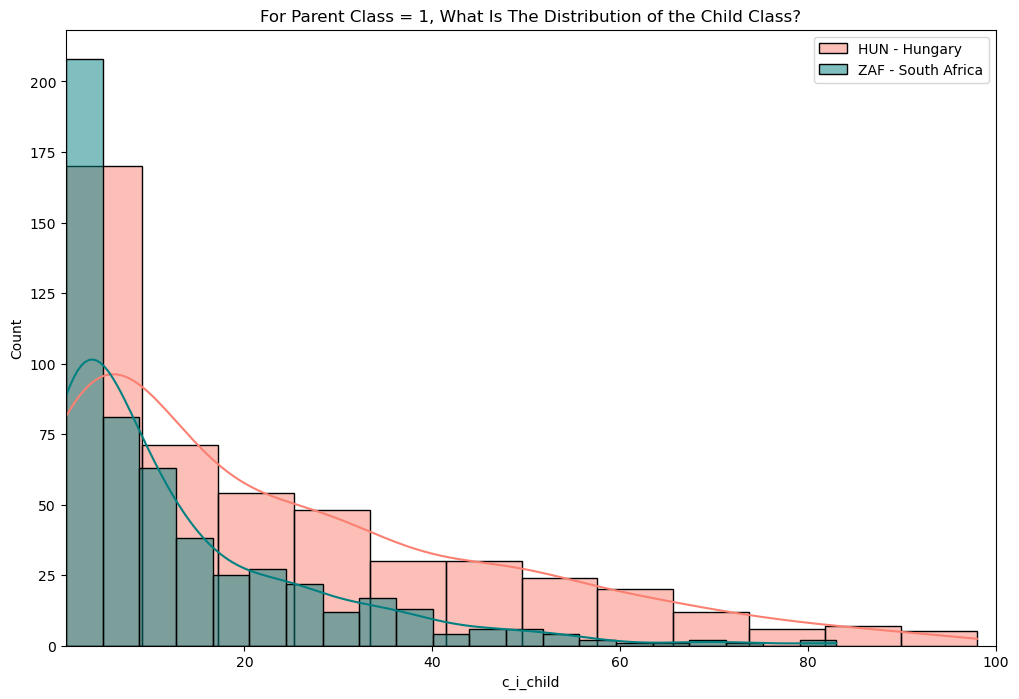

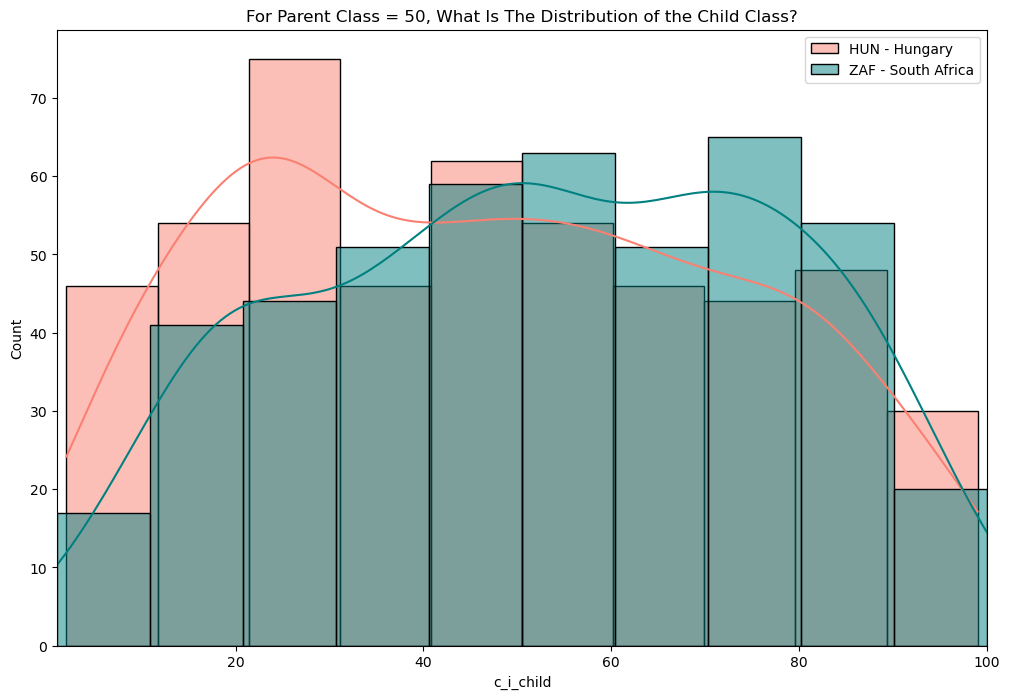

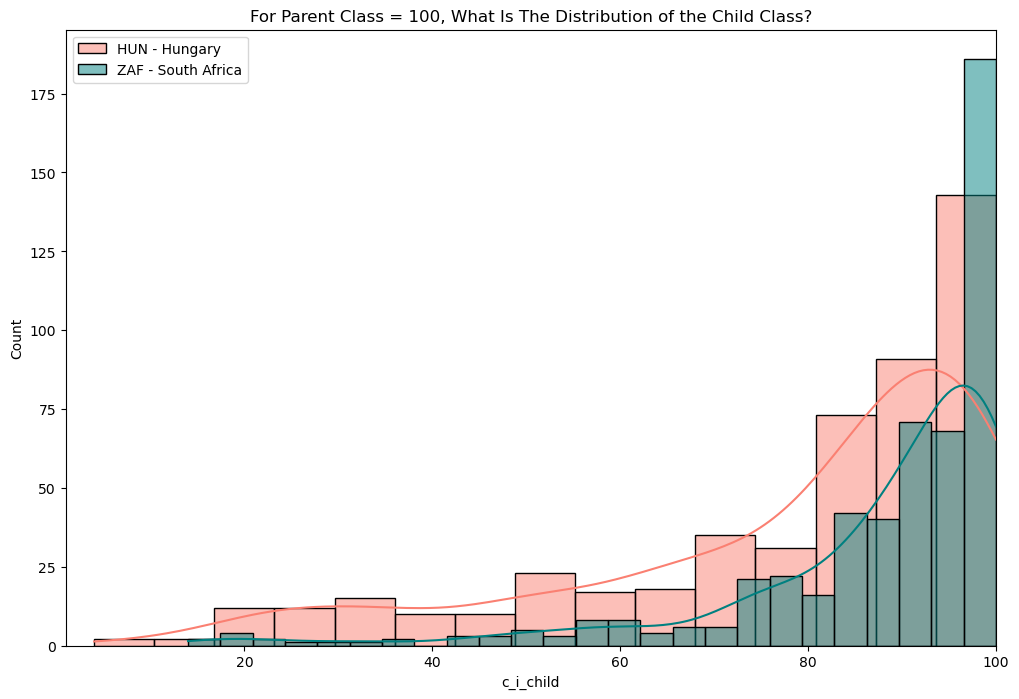

In [69]:
for parent_class in [1, 50, 100]:
    plt.figure(figsize = (12,8))
    plt.xlim(1,100)
    plt.title(f'For Parent Class = {parent_class}, What Is The Distribution of the Child Class?')
    
    
    sns.histplot(data = df_c[(df_c.country == 'HUN') & 
                          (df_c.c_i_parent == parent_class)], 
             x = "c_i_child", kde = True, color = "salmon", label = 'HUN - Hungary')
    sns.histplot(data = df_c[(df_c.country == 'ZAF') & 
                          (df_c.c_i_parent == parent_class)], 
             x = "c_i_child", kde = True, color = "teal", label = 'ZAF - South Africa')
    plt.legend()

In [63]:
df_c.to_csv('Task_2/df_c.csv')